In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as lm


Text(0.5, 1.0, 'Degree 6')

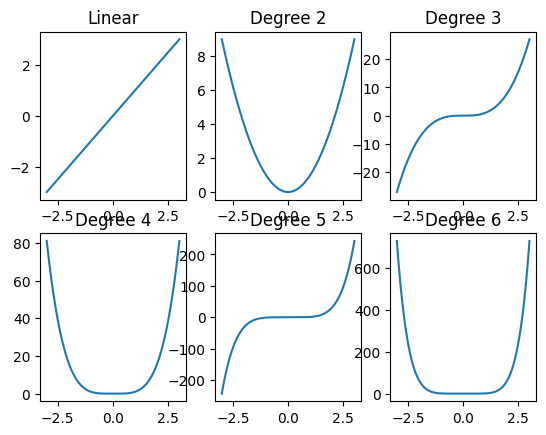

In [2]:
x = np.linspace(-3,3,1000)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
ax1.plot(x, x)
ax1.set_title("Linear")

ax2.plot(x, x**2)
ax2.set_title("Degree 2")

ax3.plot(x, x**3)
ax3.set_title("Degree 3")

ax4.plot(x, x**4)
ax4.set_title("Degree 4")

ax5.plot(x, x**5)
ax5.set_title("Degree 5")

ax6.plot(x, x**6)
ax6.set_title("Degree 6")

In [3]:
df = pd.read_csv("grades2.csv")

<Axes: xlabel='Hours_studies', ylabel='Test_grades'>

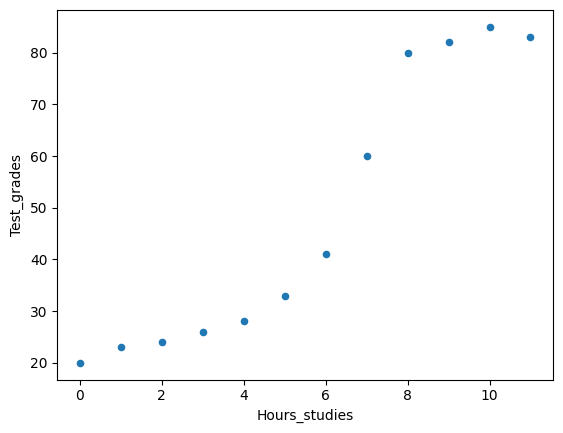

In [4]:
df.plot(kind = 'scatter', x = 'Hours_studies', y = 'Test_grades')


In [5]:
df.corr()

,Hours_studies,Test_grades
Hours_studies,1.000000,0.946236
Test_grades,0.946236,1.000000


In [6]:
lr = lm.LinearRegression

x = df.Hours_studies.values.reshape(-1,1)
y = df.Test_grades.values
lr.fit(x, y)

AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

In [ ]:
plt.scatter(x, y, )


In [ ]:
from sklearn.metrics import r2_score
print("R2: ", r2_score(y,lr.predict()))

TypeError: LinearModel.predict() missing 2 required positional arguments: 'self' and 'X'

In [ ]:
lr = lm.LinearRegression()

x = df.Hours_studies
y = df.Test_grades



1Degree Score: 0.895362110652175
2Degree Score: 0.9194632539450492
3Degree Score: 0.9627044312769241
4Degree Score: 0.9875147235702223
5Degree Score: 0.9891729810881009


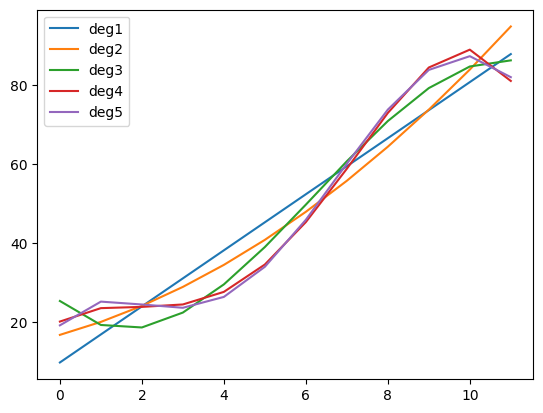

In [ ]:
for deg in [1,2,3,4,5]:
    lr.fit(np.vander(x, deg+1), y)
    y_lr = lr.predict(np.vander(x, deg+1))


    plt.plot(x, y_lr, label = 'deg'+str(deg))
    plt.legend()
    print(str(deg)+ "Degree Score: "+str(r2_score(y, y_lr)))



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = df.Hours_studies.values.reshape(-1,1)
y = df.Test_grades
deg =4
model = make_pipeline(PolynomialFeatures(deg), lr)
model.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

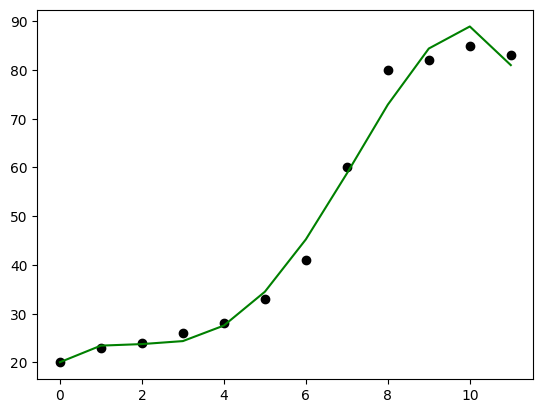

In [ ]:
plt.scatter(x,y, color= 'black')
plt.plot(x, model.predict(x), color = 'green')
